1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix:

 [[ 0.95742102  0.99018257  2.9050246 ]
 [ 0.99018257 10.25805979 12.23842493]
 [ 2.9050246  12.23842493 18.04847414]]

Determinant of the covariance matrix: 6.281780776232631e-14 

Are the results for the eigendecomposition and SVD equal? True
By selecting the component 0, we retain 93.37% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 6.63% of the total variability

Looking at the percentages of variability, we can discard the feature 2.
Therefore, the new dataset could be composed by feature 1 and feature 3.

The total variability with 2 features is equal to 100.00 %

If we observe the way in which x2 and x3 were built, we can see that x2 is the sum between
x1 and a random vector with the standard deviation higher than than the one used for x1 while
x3 is a linear combination between x1 and x2. Hence, the fact that with the component 2 we retain 0%
of the variability and with

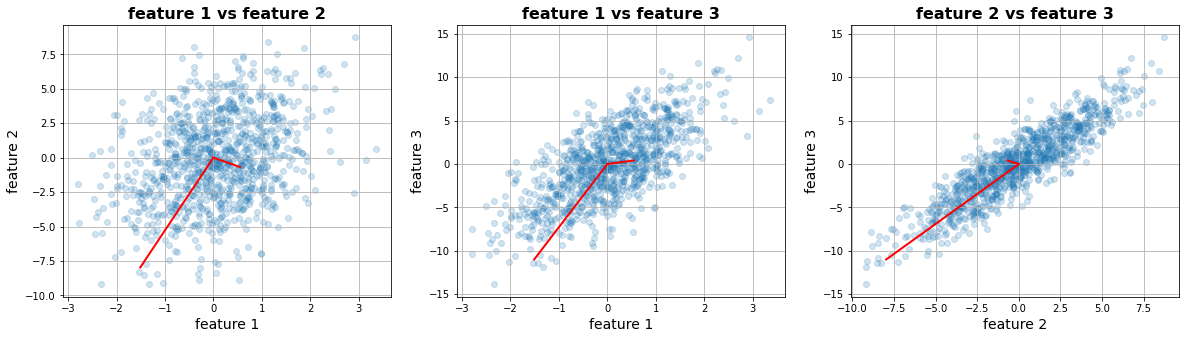


Data in the new basis:


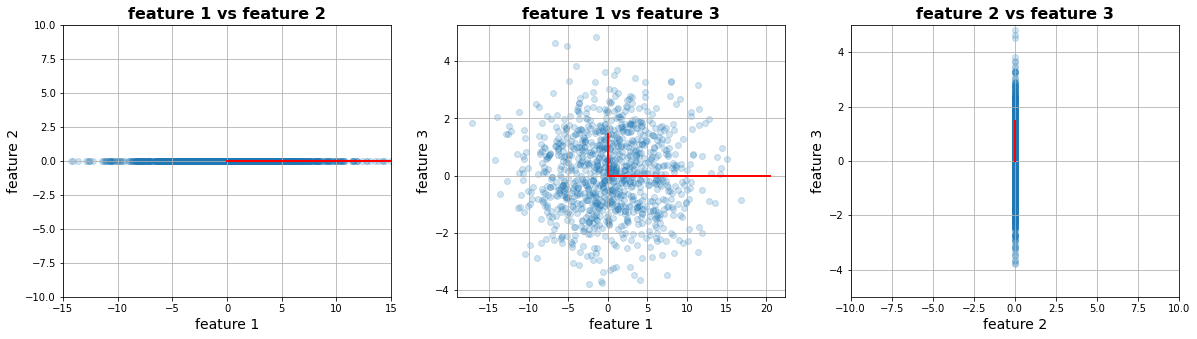

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N = 1000 # Size of each feature.

# Features.
x1 = np.random.normal(loc=0.0, scale=1.0, size=N)
x2 = x1 + np.random.normal(loc=0.0, scale=3.0, size=N)
x3 = 2*x1 + x2

# Matrix containing features.
F = np.zeros((3,N))
F[0,:] = x1
F[1,:] = x2
F[2,:] = x3

# All variables x1, x2 and x3 have zero mean, hence we can compute the covariance matrix in the following way:
C = np.cov(F)
print('Covariance matrix:\n\n',C)

# Check if the determinant is different from zero
print("\nDeterminant of the covariance matrix:", la.det(C), '\n')

# Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
l, V  = la.eig(C) # l = eigenvalues, V = matrix containing eigenvectors
l = np.real_if_close(l)

# Diagonal matrix with eigenvalues on the diagonal
lam = np.diag(l)

# Eigenvectors and eigenvalues using the SVD
U, S, Vt = la.svd(C)
S = np.real_if_close(S)

# Diagonal matrix with eigenvalues on the diagonal
D = np.diag(S)
# Covariance matrix computed with eigendecomposition
eig_dec = np.dot(V, np.dot(lam, V.T))

# Covariance matrix computed with SVD
SVD = np.dot(U, np.dot(D, Vt))

# Check that the two procedures yield to same result
print('Are the results for the eigendecomposition and SVD equal?',np.allclose(SVD, eig_dec))

print("By selecting the component 0, we retain %.2f%% of the total variability" % (abs(100*(lam[0,0]/lam.trace()))))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (abs(100*(lam[1,1]/lam.trace()))))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (abs(100*(lam[2,2]/lam.trace()))))


print('\nLooking at the percentages of variability, we can discard the feature 2.')
print('Therefore, the new dataset could be composed by feature 1 and feature 3.')

sort_l = np.sort(l) # Sort eigenvalues in ascending order.
sort_l = sort_l[::-1] # Reverse the vector

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1

print('\nThe total variability with '+str(number_of_features)+' features is equal to %.2f' %total_variability,'%')

print('\nIf we observe the way in which x2 and x3 were built, we can see that x2 is the sum between')
print('x1 and a random vector with the standard deviation higher than than the one used for x1 while')
print('x3 is a linear combination between x1 and x2. Hence, the fact that with the component 2 we retain 0%')
print('of the variability and with the component 3 we retain a small fraction of variability makes sense.')

print('\nEigendecomposition: eigenvectors of covariance matrix scaled by eigenvalues:')

fig1, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.5

ax[0].scatter(F[0,:], F[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].grid(True)

ax[1].scatter(F[0,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].grid(True)

ax[2].scatter(F[1,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].grid(True)

plt.show()
# Rotation all data points accordingly to the new base by multiplying by the transpose of matrix V
Fp = np.dot(V.T, F)

print('\nData in the new basis:')

fig2, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.75

ax[0].scatter(Fp[0,:], Fp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].axis([-15, 15, -10, 10])
ax[0].grid(True)

ax[1].scatter(Fp[0,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].grid(True)
ax[2].scatter(Fp[1,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].axis([-10, 10, -5, 5])
ax[2].grid(True)

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Determinant of the covariance matrix: 3.268246328581008

By selecting the component 0, we retain 93.24% of the total variability
By selecting the component 1, we retain 0.20% of the total variability
By selecting the component 2, we retain 6.56% of the total variability

The total variability with 2 features is equal to 99.80 %

Eigendecomposition: eigenvectors of covariance matrix scaled by eigenvalues:


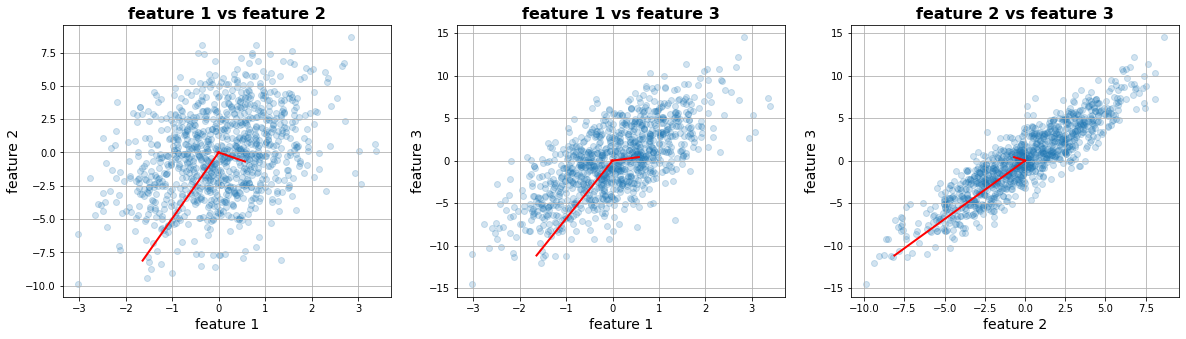


Data in the new basis:


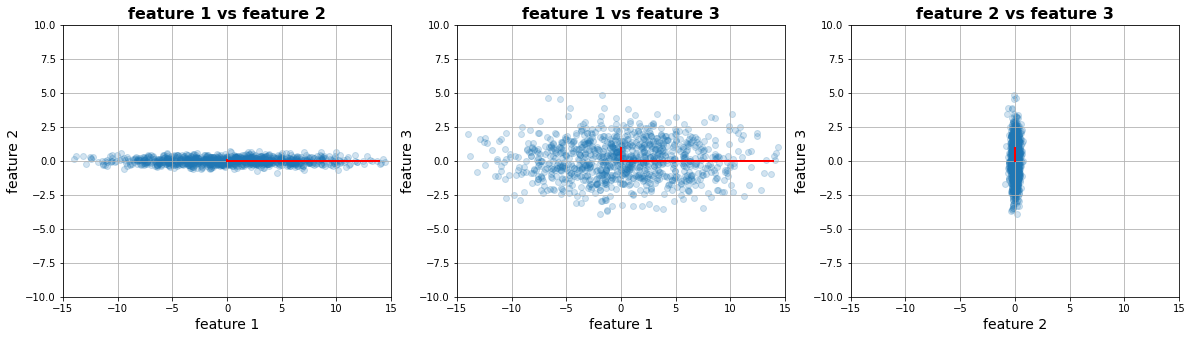

With the addition of the noise we can see that also the component 1 retains a small fraction of variability.
Moreover, we can see from the plots with the new basis that the data are more sparse and they do not somehow lay
on a line as in the fourth and sixth plot of the previous exercise.


In [2]:
# Creation of uncorrelated noise.
# It is composed by 10 variables with a standard deviation smaller than a factor 20.
noise = np.random.normal(loc=0.0, scale=2.0/20, size=(10,N))
noise = np.sum(noise, axis=0)

# Addition of the uncorrelated noise.
F[0,:] = x1 + noise
F[1,:] = x2 + noise
F[2,:] = x3 + noise

# Covariance matrix.
C = np.cov(F)

# Check if the determinant is different from zero
print("Determinant of the covariance matrix:", la.det(C))

# Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
l, V  = la.eig(C) # l = eigenvalues, V = matrix containing eigenvectors
l = np.real_if_close(l)

lam = np.diag(l)

print("\nBy selecting the component 0, we retain %.2f%% of the total variability" % (100*(lam[0,0]/lam.trace())))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (abs(100*(lam[1,1]/lam.trace()))))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (100*(lam[2,2]/lam.trace())))

sort_l = np.sort(l) # Sort eigenvalues in ascending order.
sort_l = sort_l[::-1] # Reverse the vector

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1

print('\nThe total variability with '+str(number_of_features)+' features is equal to %.2f' %total_variability,'%')

print('\nEigendecomposition: eigenvectors of covariance matrix scaled by eigenvalues:')

fig1, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.5

ax[0].scatter(F[0,:], F[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].grid(True)

ax[1].scatter(F[0,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].grid(True)

ax[2].scatter(F[1,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].grid(True)

plt.show()

# Rotation all data points accordingly to the new base by multiplying by the transpose of matrix V
Fp = np.dot(V.T, F)

print('\nData in the new basis:')

fig2, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.5

ax[0].scatter(Fp[0,:], Fp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].axis([-15, 15, -10, 10])
ax[0].grid(True)

ax[1].scatter(Fp[0,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].axis([-15, 15, -10, 10])
ax[1].grid(True)


ax[2].scatter(Fp[1,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].axis([-15, 15, -10, 10])
ax[2].grid(True)

plt.show()

print('With the addition of the noise we can see that also the component 1 retains a small fraction of variability.')
print('Moreover, we can see from the plots with the new basis that the data are more sparse and they do not somehow lay')
print('on a line as in the fourth and sixth plot of the previous exercise.')

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 